# Триангуляция Делоне итеративным алгоритмом "Удаляй и строй"

In [1]:
import math
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

def dist(a, b):
    return math.hypot(a[0] - b[0], a[1] - b[1])

class Triangle:
    def __init__(self, a, b, c):
        self.vertices  = [a, b, c]
        self.radius = None
        self.center = None

    def __str__(self):
        return str(self.vertices)

    def get_segments(self):
        a = self.vertices[0]
        b = self.vertices[1]
        c = self.vertices[2]
        return [a, b], [b, c], [c, a]

def point_in_circumscribed(triangle, point):
    if triangle.radius is None or triangle.center is None:
        (x1, y1), (x2, y2), (x3, y3) = triangle.vertices
        A = np.array([[x3 - x1, y3 - y1], [x3 - x2, y3 - y2]])
        Y = np.array([(x3**2 + y3**2 - x1**2 - y1**2),
                      (x3**2 + y3**2 - x2**2 - y2**2)])
        if np.linalg.det(A) == 0:
            return False
        Ainv = np.linalg.inv(A)
        X = 0.5 * np.dot(Ainv, Y)
        x, y = X[0], X[1]
        triangle.radius = math.sqrt((x - x1)**2 + (y - y1)**2)
        triangle.center = (x, y)
    return dist(triangle.center, point) < triangle.radius

def show_triangles(triangles):
    printed_lines = []
    for t in triangles:
        printed_lines += t.get_segments()
    lc = mc.LineCollection(printed_lines, linewidths=0.5)
    fig, ax = pl.subplots(clear=True)
    fig.set_dpi(200)
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)

In [2]:
def delete_and_build(triangles, point):
    deleted_tr = []
    deleted_points = set()
    for i in range(len(triangles)):
        if point_in_circumscribed(triangles[i], point):
            deleted_tr.append(triangles[i])
    for triangle in deleted_tr:
        triangles.remove(triangle)
        deleted_points.add(triangle.vertices[0])
        deleted_points.add(triangle.vertices[1])
        deleted_points.add(triangle.vertices[2])
    deleted_points = list(deleted_points)
    deleted_points.sort(key=lambda x:np.angle((x[0] - point[0]) + (x[1] - point[1])*1j))
    for i in range(len(deleted_points)):
        triangles.append(Triangle(deleted_points[i - 1], deleted_points[i], point))
    return triangles


[(1, 2), (5, 1), (3, 2)]
[(2, 4), (1, 2), (2, 3)]
[(1, 2), (3, 2), (2, 3)]
[(2, 3), (3, 2), (2.8, 2.7)]
[(3, 2), (5, 1), (2.8, 2.7)]
[(5, 1), (2, 4), (2.8, 2.7)]
[(2, 4), (2, 3), (2.8, 2.7)]


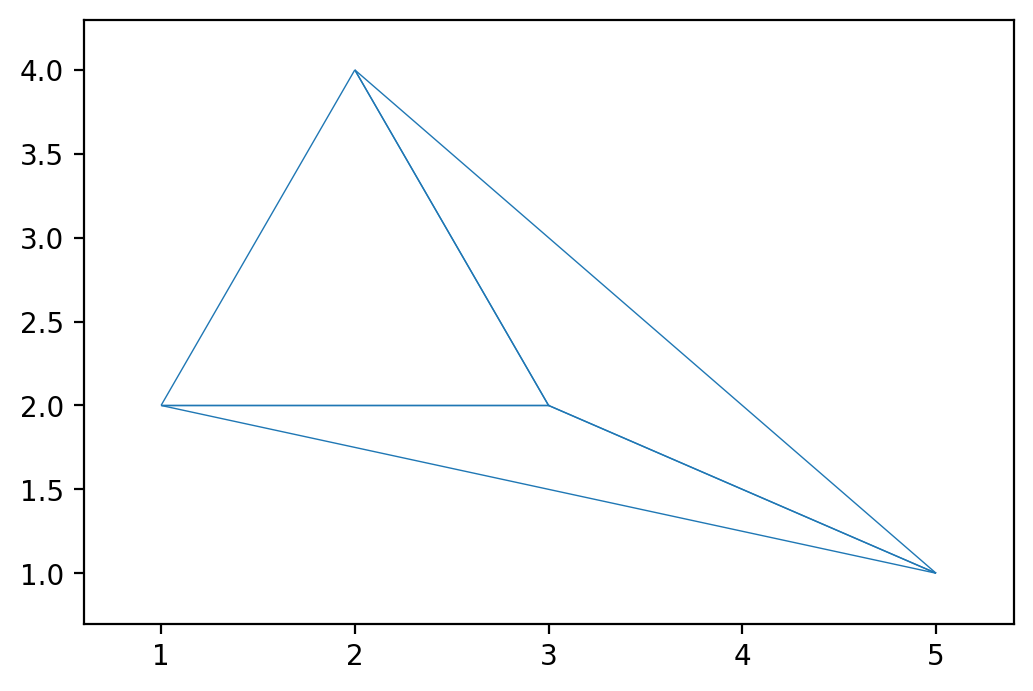

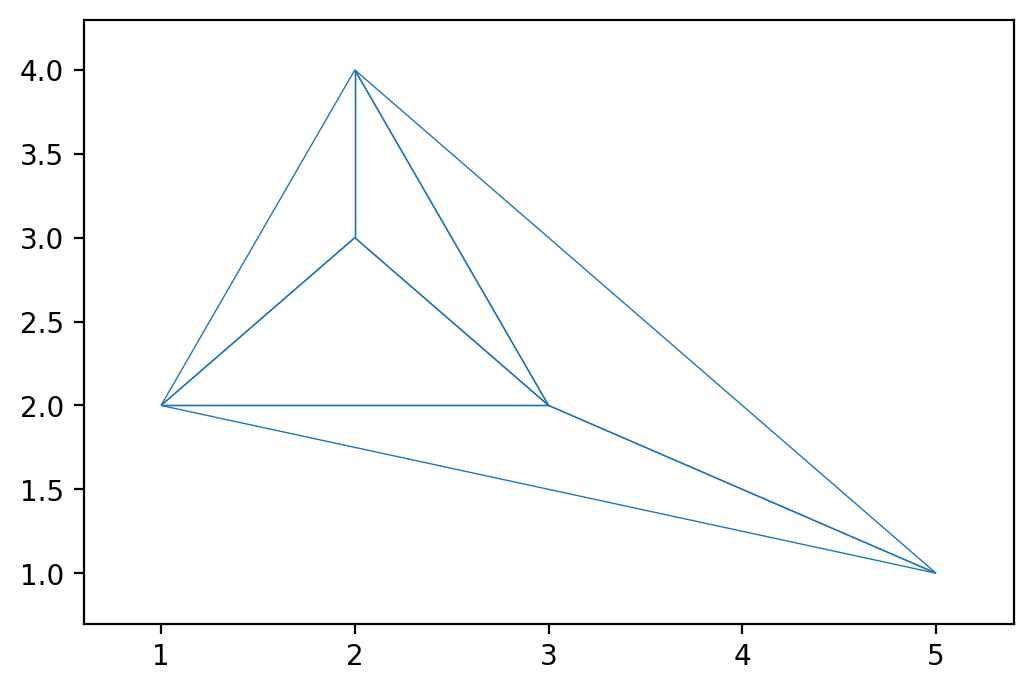

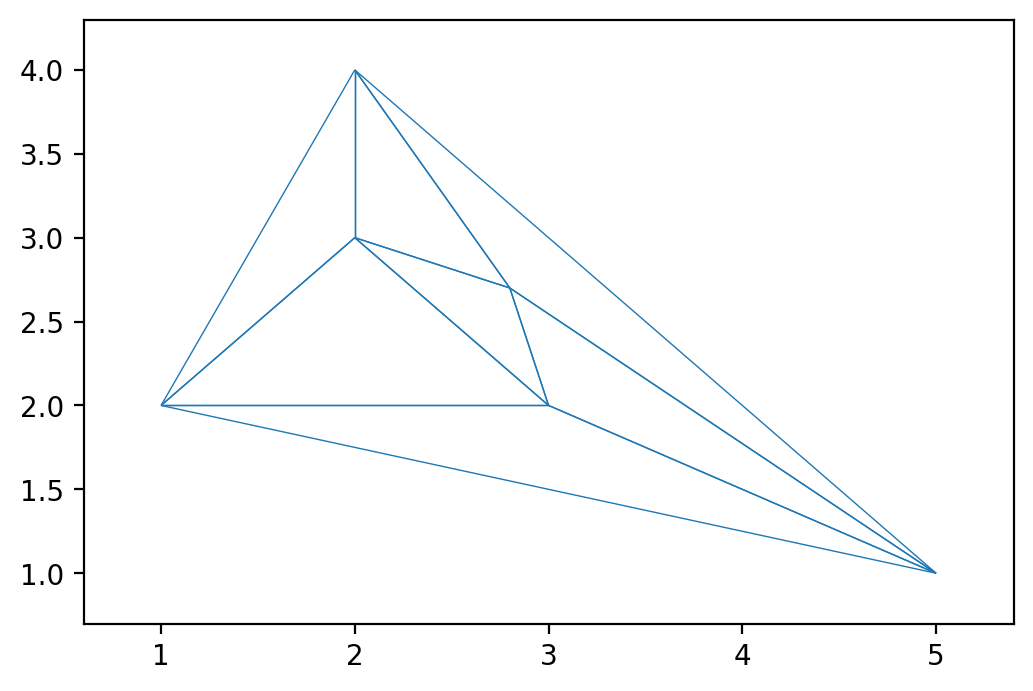

In [3]:
test_tr = Triangle((1, 2), (2, 4), (5, 1))
test_triangles = [test_tr]
test_triangles = delete_and_build(test_triangles, (3, 2))
show_triangles(test_triangles)
test_triangles = delete_and_build(test_triangles, (2, 3))
show_triangles(test_triangles)
test_triangles = delete_and_build(test_triangles, (2.8, 2.7))
for t in test_triangles:
    print(t)
show_triangles(test_triangles)

In [95]:
import random

def generate_points(n, a = 0, b = 100):
    points = set()
    for i in range(0, n):
        points.add((random.randint(a, b), random.randint(a, b)))
    return list(points)

def get_triangle_points(points):
    x_points = []
    y_points = []
    for point in points:
        x_points.append(point[0])
        y_points.append(point[1])
    min_x = min(x_points)
    min_y = min(y_points)
    max_x = max(x_points)
    max_y = max(y_points)
    middle_x = (min_x + max_x)/2
    step_x = middle_x - min_x
    left = (middle_x - step_x * 2, min_y - 1)
    right = (middle_x + step_x * 2, min_y - 1)
    up = (middle_x, min_y + (max_y - min_y) * 2.5)
    return left, right, up

def get_superstruct(points):
    x_points = []
    y_points = []
    for point in points:
        x_points.append(point[0])
        y_points.append(point[1])
    min_x = min(x_points) - 2
    min_y = min(y_points) - 2
    max_x = max(x_points) + 2
    max_y = max(y_points) + 2

    return [Triangle((min_x, min_y), (min_x, max_y), (max_x, max_y)), Triangle((min_x, min_y), (max_x, min_y), (max_x, max_y))]

202


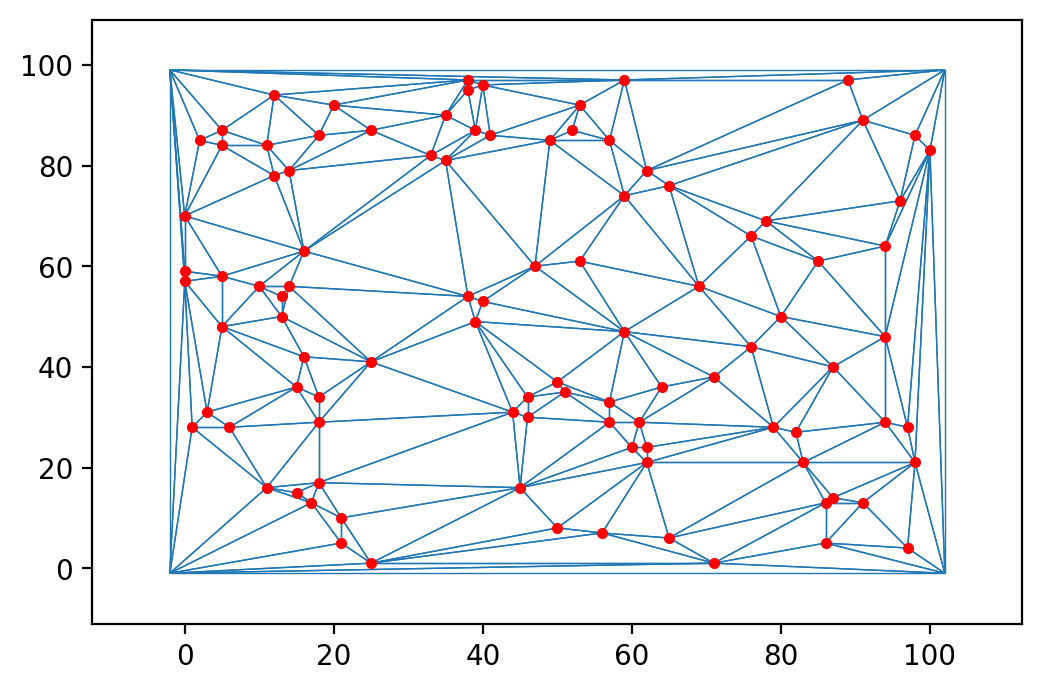

In [109]:

points = generate_points(100)
x = []
y = []
for p in points:
    x.append(p[0])
    y.append(p[1])

triangles = get_superstruct(points)
for p in points:
    triangles = delete_and_build(triangles, p)
show_triangles(triangles)
pl.plot(x, y, 'r.')

print(len(triangles))